## Exercise solution

In [1]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt

rng = np.random.default_rng(1234)
N = 3000

In [2]:
xy = rng.uniform(low=0., high=1., size=[2,N])
v = np.sum(xy**2, axis=0)

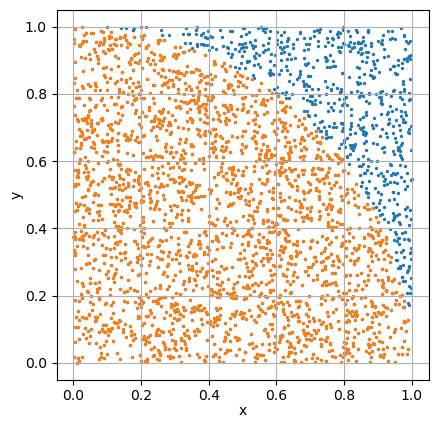

In [3]:
w, h = plt.figaspect(1.)
plt.figure(figsize=(w,h))

plt.grid(True)
plt.xlabel('x',labelpad=0.5)
plt.ylabel('y',labelpad=0.5)
plt.scatter(xy[0,:], xy[1,:], s=2)
plt.scatter(xy[0,:][v<1], xy[1,:][v<1],  s=2)

In [4]:
values = np.cumsum(np.sum(rng.uniform(0,1,size=[2,N])**2,axis=0)<1) \
/(np.arange(1,N+1))*4

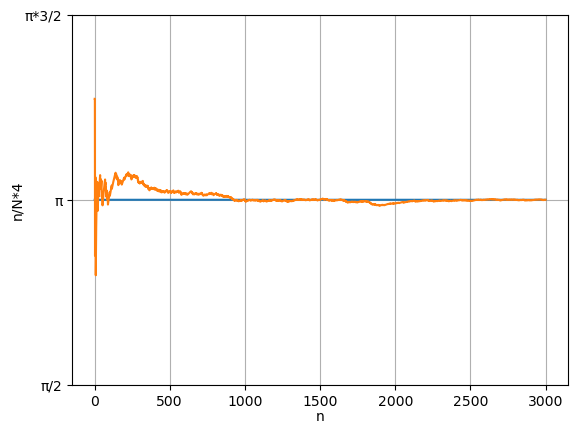

In [5]:
plt.grid(True)
plt.xlabel('n',labelpad=0.5)
plt.ylabel('n/N*4',labelpad=0.5)
plt.plot(np.arange(1,N+1), np.ones(N)*np.pi)
plt.plot(np.arange(1,N+1), values)
plt.yticks([np.pi/2, np.pi, np.pi*1.5], [u'\u03c0/2',u'\u03c0',u'\u03c0*3/2'] )
plt.show()

you can do the plot in logscale and with $\frac{1}{\sqrt(N)}$

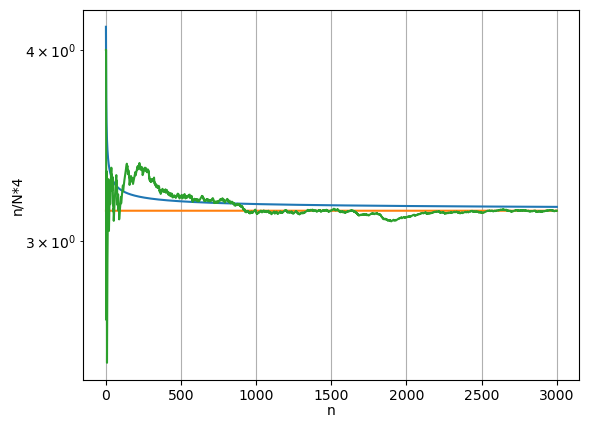

In [6]:
plt.grid(True)
plt.xlabel('n',labelpad=0.5)
plt.ylabel('n/N*4',labelpad=0.5)
plt.plot(np.arange(1,N+1), 1/np.sqrt(np.arange(1,N+1))+np.pi)
plt.plot(np.arange(1,N+1), np.ones(N)*np.pi)
plt.plot(np.arange(1,N+1), values)
plt.yticks([np.pi/2, np.pi, np.pi*1.5], [u'\u03c0/2',u'\u03c0',u'\u03c0*3/2'] )
plt.yscale('log')
plt.show()

<img src="Pandas_logo.svg">

## Pandas
Pandas is a high-performance, high-level library that provides tools for data analysis.  
It relies on the concept of DataFrame: a structured collection of data organized in records. This is the same concept of ROOT's `NTuple` that you are familiar with.  
I think the name comes from R.
<img src="dataframe.jpg" style="width:50%">

In [7]:
import numpy as np
import pandas as pd

s = pd.Series( [1., 2., 3., np.nan, 5. ], index=["a","b","c","d","e"])
s

a    1.0
b    2.0
c    3.0
d    NaN
e    5.0
dtype: float64

In [ ]:
df = pd.DataFrame( 
    {
        'Col1': [1.,2.,3.,4.],
        'Col2': ["a","b","c","d"],
        'Col3': [True, False, True, True]
    }
)
df

### Reading/Saving dataframes
Pandas support reading writing to several data formats, via specialized routines, many other formats, because dataframe (with other names) are a common concept:

| Format Type  | Data Description  | Reader           | Writer          |
|--------------|-------------------|------------------|-----------------|
| text         | CSV               | `read_csv`       | `to_csv`        |
| text         | JSON              | `read_json`      | `to_json`       |
| text         | HTML              | `read_html`      | `to_html`       |
| text 	       | Local clipboard   | `read_clipboard` | `to_clipboard ` |
| binary       | MS Excel          | `read_excel`     | `to_excel`      |
| binary       | HDF5 Format       | `read_hdf` |	`to_hdf` |
| binary       | Feather Format    | `read_feather` |	`to_feather` |
| binary       | Parquet Format    | `read_parquet` |	`to_parquet` |
| binary       | Msgpack           | `read_msgpack` | `to_msgpack` |
| binary       | Stata             | `read_stata` | 	`to_stata` |
| binary       | SAS               | `read_sas` | | 	 
| binary       | Pickle Format     | `read_pickle` |	`to_pickle` |
| SQL 	       | SQL 	           | `read_sql` | `to_sql` |
| SQL 	       | Google Big Query  | `read_gbq` | 	`to_gbq` |

As you can see the physicists *ROOT* format is not natively supported. However some external software to read `TTree`s are available. For example [`uproot`](https://github.com/scikit-hep/uproot). ROOT usually comes with pre-installed `pyROOT` library.

In [ ]:
df.dtypes

In [ ]:
df.columns

In [ ]:
df.index

### View data

In [ ]:

df = pd.DataFrame( {'A':np.random.randint(0,10,100), 'B': [2**x for x in np.arange(100)], 'C':"a"})
df.head()

In [ ]:
df.tail(2)

In [ ]:
df.describe()

### Select data

In [ ]:
dates = pd.date_range('20190527',periods=7)
df = pd.DataFrame( np.random.rand(7,4), index=dates, columns=['A','B','C','D'])
df

In [ ]:
df['A'] # or df.A

In [ ]:
df[0:2]

In [ ]:
df['20190529':'20190531']

In [ ]:
dates

In [ ]:
df.loc[dates[2]]

In [ ]:
df.loc[dates[2],['B','C']]

In [ ]:
df.iloc[2,1:3]

In [ ]:
df[ df>0.5 ]

### Setting values

In [ ]:
s = pd.Series( np.random.rand(7), index=dates )
s

In [ ]:
df['E'] = s
df

In [ ]:
df.loc[:,['C']] = 0
df

### Operations

In [ ]:
df.mean()

In [ ]:
df.mean(axis=1)

## Merging dataframes

In [ ]:
df1 = pd.DataFrame( np.random.rand(7,2), index=dates, columns=['A','B'])
df2 = pd.DataFrame( np.random.rand(7,3), index=dates, columns=['C','D','E'])
pd.concat([df1,df2],sort=False)

In [ ]:
pd.concat([df1,df2],axis=1,join='inner') #same syntax as for db (ineer, outer, left, right)

### Grouping

In [ ]:
s = pd.Series( ["a","b","a","c","a","c","b"], index=dates)
df['E']=s
df

In [ ]:
df.groupby('E').sum()

### Pivot table

In [ ]:
dates = pd.date_range('20190527',periods=6, name='date')
df = pd.DataFrame( np.random.rand(6,3), index=dates, columns=['A','B','C'])
df['D'] = pd.Series(["a","a","b","b","c","c"],index=dates)
df['E'] = pd.Series(["one","two","one","two","one","two"],index=dates)
df

In [ ]:
pd.pivot_table(df, values=['A','B','C'], index=['D','E'])

### Plotting data

In [ ]:
df.plot()